<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-SinaiAvalos/blob/main/Actividad%20Semanal--7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 7 Regresiones y K means**

Nombre: Sinaí Avalos Rivera

Matrícula: A01730466

Materia: Ciencia y analítica de datos

Profesor: María de la Paz Rico Fernández

Fecha: 11 de noviembre de 2022



# **NOTEBOOK 1. REGRESIÓN.**

# LINEAR MODELS


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

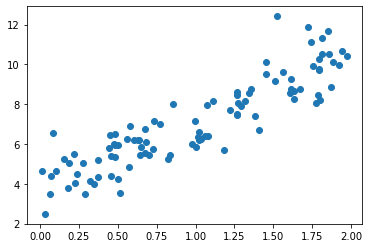

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

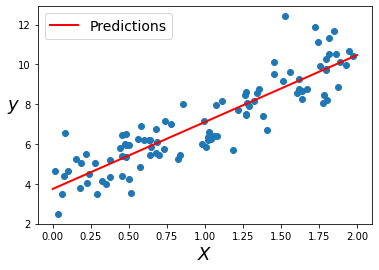

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

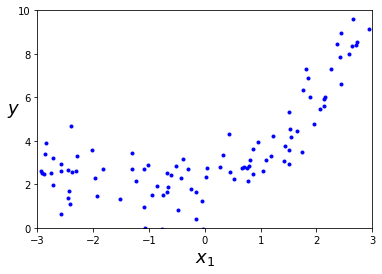

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

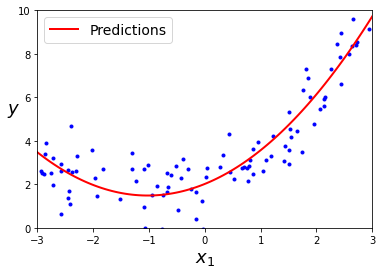

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

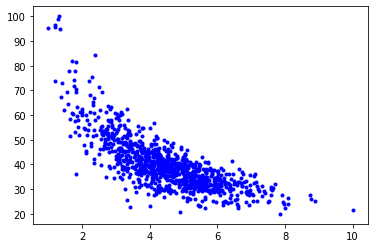

In [26]:
plt.plot(X,y,'b.')

**Regresión lineal**

In [27]:
#lineal

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [28]:
#Partición de datos

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.30, random_state = 42)


Regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [29]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(Xtv, ytv)

y_hat = linear_reg.predict(X)

In [30]:
#Intersección y coeficientes

print("Intersección:")
print(linear_reg.intercept_)

print("\nCoeficiente:")
print(linear_reg.coef_)


Intersección:
67.69605012749729

Coeficiente:
[-6.17788033]


In [31]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y,y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,y_hat)))
print('r2_score',r2_score(y,y_hat))

Error medio Absoluto (MAE): 4.939597008496299
Root Mean Squared Error: 6.874192552027151
r2_score 0.57864358571372


In [32]:
error_MAE_lr =  metrics.mean_absolute_error(y, y_hat)
error_RMSE_lr = np.sqrt(metrics.mean_squared_error(y, y_hat))
error_r2_lr = r2_score(y, y_hat)

print('Error medio Absoluto (MAE):', error_MAE_lr)
print('Root Mean Squared Error:', error_RMSE_lr)
print('r2_score', error_r2_lr)

Error medio Absoluto (MAE): 4.939597008496299
Root Mean Squared Error: 6.874192552027151
r2_score 0.57864358571372


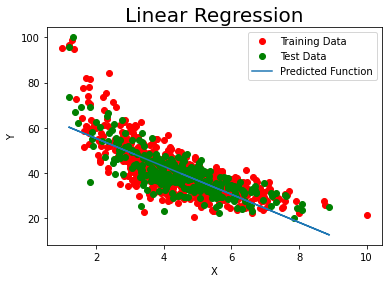

In [33]:
y_hat = linear_reg.predict(Xtest)

plt.plot(Xtv, ytv, 'ro', label='Training Data')
plt.plot(Xtest, ytest, 'go', label='Test Data')
plt.plot(Xtest, y_hat, label='Predicted Function')
plt.title('Linear Regression', fontsize=20)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

**Regresión Polinomial**

In [34]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=3, include_bias=False)

x_polly=pr.fit_transform(X.values)
x_train_polly = pr.fit_transform(Xtv.values)
x_test_polly = pr.fit_transform(Xtest.values)

polly_model = LinearRegression(fit_intercept=True)
polly_model.fit(x_train_polly, ytv)

yhat = polly_model.predict(x_polly)

In [35]:
#Intersección y coeficientes

print("Intersección:")
print(polly_model.intercept_)

print("\nCoeficientes:")
print(polly_model.coef_)


Intersección:
113.72389788789451

Coeficientes:
[-33.90139997   4.87063075  -0.24671164]


In [36]:
error_MAE_pr =  metrics.mean_absolute_error(y, yhat)
error_RMSE_pr = np.sqrt(metrics.mean_squared_error(y, yhat))
error_r2_pr = r2_score(y, yhat)

print('Error medio Absoluto (MAE):', error_MAE_pr)
print('Root Mean Squared Error:', error_RMSE_pr)
print('r2_score', error_r2_pr)

Error medio Absoluto (MAE): 4.49169514547131
Root Mean Squared Error: 5.931601464733987
r2_score 0.6862742608497483


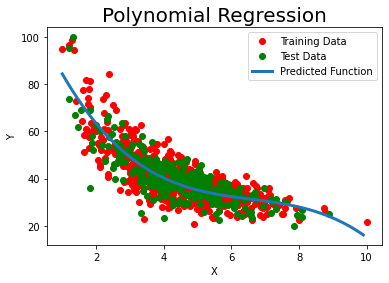

In [37]:
xmax=max([Xtv.values.max(), Xtest.values.max()])
xmin=min([Xtv.values.min(), Xtest.values.min()])
x=np.arange(xmin, xmax, 0.1)

plt.plot(Xtv, ytv, 'ro', label='Training Data')
plt.plot(Xtest, ytest, 'go', label='Test Data')
plt.plot(x, polly_model.predict(pr.fit_transform(x.reshape(-1, 1))), linewidth=3, label='Predicted Function')
plt.title('Polynomial Regression', fontsize=20)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()

**Ridge regression**


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

pr=PolynomialFeatures(degree=3, include_bias=False)
x_polly = pr.fit_transform(X.values)
Xtv_pr = pr.fit_transform(Xtv)
Xtest_pr = pr.fit_transform(Xtest)

alpha = 0.001

ridge_model = Pipeline([
    ("polynomial_features", pr),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=alpha, solver='cholesky', random_state=42))
])

ridge_model.fit(Xtv_pr, ytv)

yhat = ridge_model.predict(x_polly)

In [39]:
#Intersección y coeficientes

print("Intersección:")
print(ridge_model.named_steps['ridge'].intercept_)

print("\nCoeficiente:")
print(ridge_model.named_steps['ridge'].coef_)

Intersección:
40.078226500114084

Coeficiente:
[-109.39300383  143.2790714   -83.20254289  143.27907139  -83.20254287
  -20.15150565  -20.15150564   56.05682098   17.64429495  -83.20254285
  -20.15150565   56.05682089   56.05682094   17.64429495  -51.10289362
   17.64429497  -51.10289361  -48.09475408   53.02508501]


In [40]:
error_MAE_rr =  metrics.mean_absolute_error(y, yhat)
error_RMSE_rr = np.sqrt(metrics.mean_squared_error(y, yhat))
error_r2_rr = r2_score(y, yhat)

print('Error medio Absoluto (MAE):', error_MAE_rr)
print('Root Mean Squared Error:', error_RMSE_rr)
print('r2_score', error_r2_rr)

Error medio Absoluto (MAE): 4.423425553754387
Root Mean Squared Error: 5.847807241644448
r2_score 0.6950754994132771


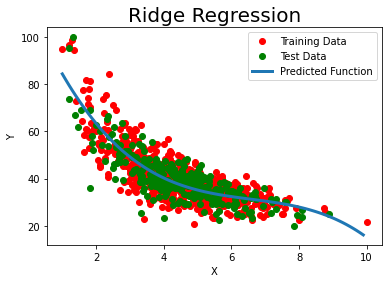

In [41]:
ridge_modelreg = Ridge(alpha=alpha, random_state = 42)
ridge_modelreg.fit(Xtv_pr,ytv)

plt.plot(Xtv, ytv, 'ro', label='Training Data')
plt.plot(Xtest, ytest, 'go', label='Test Data')
plt.plot(x, ridge_modelreg.predict(pr.fit_transform(x.reshape(-1, 1))), linewidth=3, label='Predicted Function')
plt.title('Ridge Regression', fontsize=20)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()

**Lasso regression**



In [42]:
pr=PolynomialFeatures(degree=3, include_bias=False)
x_polly = pr.fit_transform(X.values)
Xtv_pr = pr.fit_transform(Xtv)
Xtest_pr = pr.fit_transform(Xtest)

alpha = 0.001

lasso_model = Pipeline([
    ("polynomial_features", pr),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=alpha, random_state=42))
])

lasso_model.fit(Xtv_pr, ytv)

yhat = lasso_model.predict(x_polly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.907e+03, tolerance: 8.075e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [43]:
#Intersección y coeficientes

print("Intersección:")
print(lasso_model.named_steps['lasso'].intercept_)

print("\nCoeficiente:")
print(lasso_model.named_steps['lasso'].coef_)

Intersección:
40.07822650011431

Coeficiente:
[-3.62173732e+01  3.07553085e+01  1.58396185e+00  2.99323495e-01
 -1.47152268e-01 -4.10288138e+00 -1.54678968e-13 -3.87477165e+00
 -6.59465182e-01  8.13451572e+00 -3.57197089e+00 -3.41585855e+00
 -0.00000000e+00 -2.76674448e-01  1.03919720e-01 -3.88765085e-01
  1.78676917e-01  1.82656208e+00  1.38566466e+00]


In [44]:
error_MAE_lar =  metrics.mean_absolute_error(y, yhat)
error_RMSE_lar = np.sqrt(metrics.mean_squared_error(y, yhat))
error_r2_lar = r2_score(y, yhat)

print('Error medio Absoluto (MAE):', error_MAE_lar)
print('Root Mean Squared Error:', error_RMSE_lar)
print('r2_score', error_r2_lar)

Error medio Absoluto (MAE): 4.484558626818112
Root Mean Squared Error: 5.935699304434247
r2_score 0.6858406370220624


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+04, tolerance: 8.075e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


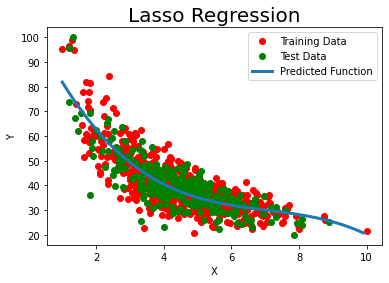

In [45]:
lasso_modelreg = Lasso(alpha=alpha, random_state = 42)
lasso_modelreg.fit(Xtv_pr,ytv)

plt.plot(Xtv, ytv, 'ro', label='Training Data')
plt.plot(Xtest, ytest, 'go', label='Test Data')
plt.plot(x, lasso_modelreg.predict(pr.fit_transform(x.reshape(-1, 1))), linewidth=3, label='Predicted Function')
plt.title('Lasso Regression', fontsize=20)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()

**MAE y R2 de los cuatro métodos**

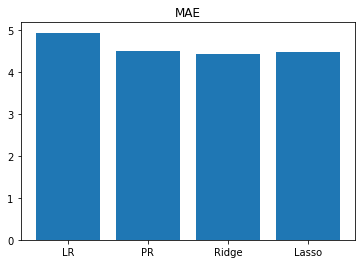

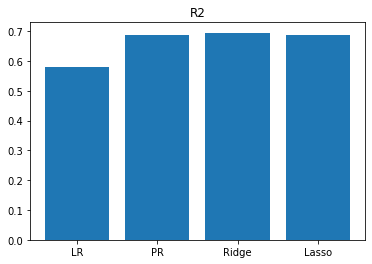

In [46]:
lista_MAE=[]
lista_R2=[]


#Regresion Simple
lista_MAE.append(error_MAE_lr)  
lista_R2.append(error_r2_lr)

#Regresion Polinomial
lista_MAE.append(error_MAE_pr)  
lista_R2.append(error_r2_pr)

#Ridge Regression
lista_MAE.append(error_MAE_rr)  
lista_R2.append(error_r2_rr)

#Lasso Regression
lista_MAE.append(error_MAE_lar)  
lista_R2.append(error_r2_lar)

nombres=list()
nombres.append('LR')
nombres.append('PR')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_MAE)
plt.title('MAE')
plt.show()

nombres=list()
nombres.append('LR')
nombres.append('PR')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_R2)
plt.title('R2')
plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por qué?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Se hace una partición de datos, con un 30% para datos de prueba y el resto para entrenamiento y validación. 

En cuanto a los resultados obtenidos, tal como se observa el Mean Absolute Error (MAE) más bajo lo presenta el modelo de regresión de Ridge, además de tener un R2 más alto que el modelo de regresión linear simple, polinomial y de Lasso.

Debido al MAE obtenido con el modelo de Ridge, es el modelo que presenta mejor rendimiento con el conjunto de datos, ya que entre más bajo sea este valor, implica una mayor precisión en el modelo de regresión. Pero también se debe buscar tener un valor alto de R2, puesto que también es una medida de ajuste para los modelos de regresión lineal.

Sin embargo, el modelo de regresión polinomial también sería una buena opción para elegir puesto que presenta el segundo MAE más bajo y el R2 más alto.

Los valores de los errores obtenidos para estos dos modelos mencionados son aceptables puesto que su R2 se aproxima bastante a un valor de 0.7 en general, por lo que la proporción de los modelos es explicado en buena medida.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


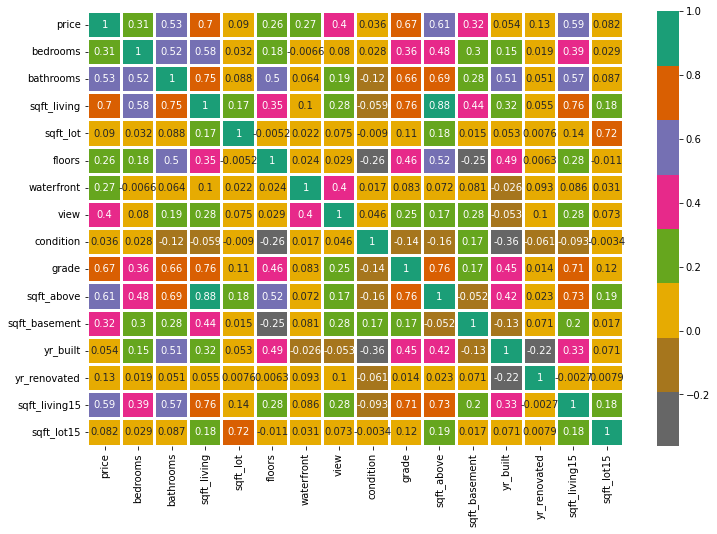

In [51]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

**Se seleccionan solo los 3 features más importantes del conjunto de datos (los que mayor correlación presentan), puesto que sino se presenta un desbordamiento de memoria. Estos features son seleccionados con base en el heatmap.**

In [52]:
# columns = df.columns.drop('price')

# features = columns
# label = ['price']

features = ['sqft_living', 'grade', 'sqft_above']
label = ['price']

X = df[features]
y = df[label]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 3)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 3)


**Regresión Lineal**

In [54]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

y_hat = linear_reg.predict(X)

In [55]:
#Intersección y coeficientes

print("Intersección:")
print(linear_reg.intercept_)

print("\nCoeficiente:")
print(linear_reg.coef_)

Intersección:
[-645501.32335855]

Coeficiente:
[[ 2.33597751e+02  1.10070495e+05 -8.02037798e+01]]


In [56]:
error_MAE_lr =  metrics.mean_absolute_error(y, y_hat)
error_RMSE_lr = np.sqrt(metrics.mean_squared_error(y, y_hat))
error_r2_lr = r2_score(y, y_hat)

print('Error medio Absoluto (MAE):', error_MAE_lr)
print('Root Mean Squared Error:', error_RMSE_lr)
print('r2_score', error_r2_lr)

Error medio Absoluto (MAE): 161945.8259829235
Root Mean Squared Error: 248723.03438957047
r2_score 0.5409933329860699


**Polynomial Regression**

In [57]:
pr=PolynomialFeatures(degree=3, include_bias=False)

x_polly=pr.fit_transform(X.values)
x_train_polly = pr.fit_transform(X_train.values)
x_test_polly = pr.fit_transform(X_test.values)

polly_model = LinearRegression(fit_intercept=True)
polly_model.fit(x_train_polly, y_train)

yhat = polly_model.predict(x_polly)

In [58]:
#Intersección y coeficientes

print("Intersección:")
print(polly_model.intercept_)

print("\nCoeficientes:")
print(polly_model.coef_)

Intersección:
[153461.88414047]

Coeficientes:
[[-2.89414165e+02  1.07179117e+05  8.32767542e+00 -2.86269228e-01
   1.46838260e+02  4.39824550e-01 -3.19258043e+04 -5.00699970e+01
  -1.81228448e-01  5.05196396e-05  3.48782007e-02 -2.57948124e-04
  -1.34393947e+01 -3.01519529e-02  3.62996052e-04  2.65470424e+03
   7.17968835e+00 -2.96679521e-03 -1.51232416e-04]]


In [59]:
error_MAE_pr =  metrics.mean_absolute_error(y, yhat)
error_RMSE_pr = np.sqrt(metrics.mean_squared_error(y, yhat))
error_r2_pr = r2_score(y, yhat)

print('Error medio Absoluto (MAE):', error_MAE_pr)
print('Root Mean Squared Error:', error_RMSE_pr)
print('r2_score', error_r2_pr)

Error medio Absoluto (MAE): 148719.7382325265
Root Mean Squared Error: 226752.19415350867
r2_score 0.6185040118793765


**Ridge Regression**

In [60]:
x_polly = pr.fit_transform(X.values)
Xtv_pr = pr.fit_transform(X_train)
Xtest_pr = pr.fit_transform(X_test)

alpha = 0.001

ridge_model = Pipeline([
    ("polynomial_features", pr),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=alpha, solver='cholesky', random_state=42))
])

ridge_model.fit(Xtv_pr, y_train)

yhat = ridge_model.predict(x_polly)

In [61]:
#Intersección y coeficientes

print("Intersección:")
print(ridge_model.named_steps['ridge'].intercept_)

print("\nCoeficiente:")
print(ridge_model.named_steps['ridge'].coef_)

Intersección:
[539150.73672304]

Coeficiente:
[[  264453.59292023  -130935.13800369 -1335162.60570943 ...
  -1664748.29906272 -1058773.84665969  1228636.96486295]]


In [62]:
error_MAE_rr =  metrics.mean_absolute_error(y, yhat)
error_RMSE_rr = np.sqrt(metrics.mean_squared_error(y, yhat))
error_r2_rr = r2_score(y, yhat)

print('Error medio Absoluto (MAE):', error_MAE_rr)
print('Root Mean Squared Error:', error_RMSE_rr)
print('r2_score', error_r2_rr)

Error medio Absoluto (MAE): 147907.57409003834
Root Mean Squared Error: 233187.30089556385
r2_score 0.596543450487331


**Lasso regression**

In [63]:
x_polly = pr.fit_transform(X.values)
Xtv_pr = pr.fit_transform(X_train)
Xtest_pr = pr.fit_transform(X_test)

alpha = 0.001

lasso_model = Pipeline([
    ("polynomial_features", pr),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=alpha, random_state=42))
])

lasso_model.fit(Xtv_pr, y_train)

yhat = lasso_model.predict(x_polly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.875e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [64]:
#Intersección y coeficientes

print("Intersección:")
print(lasso_model.named_steps['lasso'].intercept_)

print("\nCoeficiente:")
print(lasso_model.named_steps['lasso'].coef_)

Intersección:
[539150.73672305]

Coeficiente:
[-52382.05184584  60162.18681832  63865.10752639 ... -14484.96749782
  -3012.40865052   7611.74371728]


In [65]:
error_MAE_lar =  metrics.mean_absolute_error(y, yhat)
error_RMSE_lar = np.sqrt(metrics.mean_squared_error(y, yhat))
error_r2_lar = r2_score(y, yhat)

print('Error medio Absoluto (MAE):', error_MAE_lar)
print('Root Mean Squared Error:', error_RMSE_lar)
print('r2_score', error_r2_lar)

Error medio Absoluto (MAE): 148533.9906332278
Root Mean Squared Error: 224313.74574860735
r2_score 0.6266649593846014


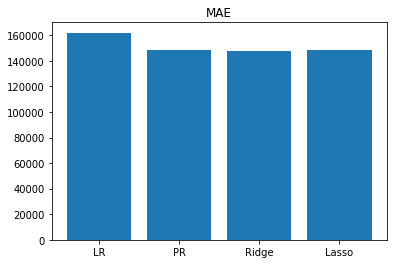

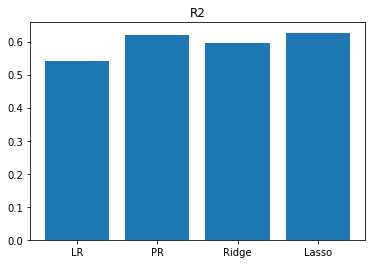

In [66]:
lista_MAE=[]
lista_R2=[]


#Regresion Simple
lista_MAE.append(error_MAE_lr)  
lista_R2.append(error_r2_lr)

#Regresion Polinomial
lista_MAE.append(error_MAE_pr)  
lista_R2.append(error_r2_pr)

#Ridge Regression
lista_MAE.append(error_MAE_rr)  
lista_R2.append(error_r2_rr)

#Lasso Regression
lista_MAE.append(error_MAE_lar)  
lista_R2.append(error_r2_lar)

nombres=list()
nombres.append('LR')
nombres.append('PR')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_MAE)
plt.title('MAE')
plt.show()

nombres=list()
nombres.append('LR')
nombres.append('PR')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_R2)
plt.title('R2')
plt.show()

**Explica tus resultados, que método se aproxima mejor.**

Se realizó una partición de datos, con un 10% para datos de prueba y el resto para entrenamiento y validación.

En cuanto a los resultados obtenidos, tal como se observa el Mean Absolute Error (MAE) más bajo lo presenta el modelo de regresión de Ridge, además de tener un R2 sin embargo el R2 es bajo (0.596).

Sin embargo, el modelo Lasso a pesar de tener un rendimiento considerable puesto que su R2 es de 0.62 y un MAE de los más bajos en comparación con los otros modelos, es un modelo que no converge por lo que es descartado.

Por otra parte, el modelo de regresión polinomial presenta el tercer MAE más bajo y el segundo R2 más alto de todos los modelos.

Otro aspecto considerable a señalar es que los MAE son altos, y los R2 bajos. Por lo que para mejorar el rendimiento de los modelos, se debería proceder a realizar más validaciones para lograr encontrar el modelo que mejor se ajuste.